# GEOG 5160 6160 Lab 08

## Data processing

Let's start by by importing the modules we'll need for the class, then we'll go get the data

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
## Set random seed for reproducibility
np.random.seed(1234)

### California housing data

We'll start by reading in and plotting the California housing dataset. The following code reads the file and cleans up the data. We then create two data sets to show how the algorithm works, one with only the coordinates as features, and the other with the usual set of house characteristics as features. The only new code here divides the house values by 1000 to help in displaying some of the output. Refer back to the previous labs for explanations of this code:

In [2]:
housing = pd.read_csv("../datafiles/housing.csv")
print(housing.shape)

(20640, 10)


In [3]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Next use the `dropna()` method to remove missing values:

In [4]:
housing = housing.dropna()
housing.shape

(20433, 10)

Next, we'll transform the data: a) convert the `ocean_proximity` variable into a simple binary and b) convert some of the numerical values

In [5]:
ocean_cats = housing.ocean_proximity != "INLAND" ## Conditional to make two groups inland vs all others
ocean_cats = ocean_cats.astype('category') ## Convert to categorical
ocean_cats = ocean_cats.cat.codes ## Extract the code numerical labels (0/1)
housing['ocean_new'] = ocean_cats ## Replace original ocean_proximity

In [6]:
housing['avg_rooms'] = housing.total_rooms / housing.households
housing['bedroom_ratio'] = housing.total_bedrooms / housing.total_rooms
housing.median_house_value = housing.median_house_value / 1000

Lastly, let's remove the districts with a median value above $500,000 (the data are capped at this value):

In [7]:
housing = housing[housing.median_house_value <= 500000]

Now let's look at the new data

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_new,avg_rooms,bedroom_ratio
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206.864413,0.682083,5.431344,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115.435667,0.465678,2.482946,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000,0.000000,0.846154,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119.500000,0.000000,4.441441,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179.700000,1.000000,5.230769,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264.700000,1.000000,6.052381,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000,1.000000,141.909091,1.000000


## Tree methods

### Classification and regression trees

Classification and Regression Trees (CART) is a non-linear, non-parametric modeling approach that can be used with a wide variety of data. Regression trees are used with continuous outcome data, and classification trees with binary or categorical data, but the interface for these is the same in scikit-learn.

#### Regression trees

We will start by fitting a regression tree to the California housing data. We first split the data into training and testing sets. For this first example, we'll only model the district median house value as a function of the coordinates:

In [9]:
from sklearn.model_selection import train_test_split

var_names = ['longitude', 'latitude']
X = housing[var_names]
y = housing['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8)

The function that we are going to use is `DecisionTreeRegressor()`, designed for regression tasks. This is a submodule `tree` that contains several tree-based algorithms. Import this, then create a new `DecisionTreeRegressor()` object and use the data to fit it.

In [10]:
from sklearn import tree

ca_tree = tree.DecisionTreeRegressor()
ca_tree = ca_tree.fit(X_train, y_train)

Once fit, we can start to explore the results. If you now use the `export_text()` method, you will see the tree structure in text format. Each line shows a split in tree, with the feature used to split the data (and the values at the split). Values in `[]` represent the value of the `median_house_value` in a terminal node. Splits that are indented represent subsequent partitions.

In [11]:
r = tree.export_text(ca_tree, feature_names = var_names)
print(r)

|--- latitude <= 37.94
|   |--- longitude <= -121.87
|   |   |--- latitude <= 37.59
|   |   |   |--- longitude <= -122.05
|   |   |   |   |--- latitude <= 37.20
|   |   |   |   |   |--- latitude <= 36.99
|   |   |   |   |   |   |--- latitude <= 36.97
|   |   |   |   |   |   |   |--- longitude <= -122.06
|   |   |   |   |   |   |   |   |--- value: [258.30]
|   |   |   |   |   |   |   |--- longitude >  -122.06
|   |   |   |   |   |   |   |   |--- value: [226.50]
|   |   |   |   |   |   |--- latitude >  36.97
|   |   |   |   |   |   |   |--- longitude <= -122.09
|   |   |   |   |   |   |   |   |--- value: [350.00]
|   |   |   |   |   |   |   |--- longitude >  -122.09
|   |   |   |   |   |   |   |   |--- value: [320.90]
|   |   |   |   |   |--- latitude >  36.99
|   |   |   |   |   |   |--- longitude <= -122.06
|   |   |   |   |   |   |   |--- longitude <= -122.17
|   |   |   |   |   |   |   |   |--- value: [284.10]
|   |   |   |   |   |   |   |--- longitude >  -122.17
|   |   |   |   |   

With the default settings, we get a very large tree, with a lot of splits. There are a number of hyperparameters that allow you to restrict the number of splits. A simple one is `max_depth`, which limits the number of splits down any branch of the tree. Let's set this to 3 and show the results:

In [12]:
ca_tree = tree.DecisionTreeRegressor(max_depth = 3)
ca_tree = ca_tree.fit(X_train, y_train)
r = tree.export_text(ca_tree, feature_names = var_names)
print(r)

|--- latitude <= 37.94
|   |--- longitude <= -121.87
|   |   |--- latitude <= 37.59
|   |   |   |--- value: [322.27]
|   |   |--- latitude >  37.59
|   |   |   |--- value: [263.82]
|   |--- longitude >  -121.87
|   |   |--- latitude <= 34.49
|   |   |   |--- value: [223.29]
|   |   |--- latitude >  34.49
|   |   |   |--- value: [130.07]
|--- latitude >  37.94
|   |--- latitude <= 39.06
|   |   |--- longitude <= -122.38
|   |   |   |--- value: [215.06]
|   |   |--- longitude >  -122.38
|   |   |   |--- value: [141.16]
|   |--- latitude >  39.06
|   |   |--- latitude <= 39.35
|   |   |   |--- value: [120.14]
|   |   |--- latitude >  39.35
|   |   |   |--- value: [86.10]



We can also plot the tree to see its structure. This shows for each node, the splitting condition, the `mse` or error rate, the number of observations in that node and the mean value in the node.  

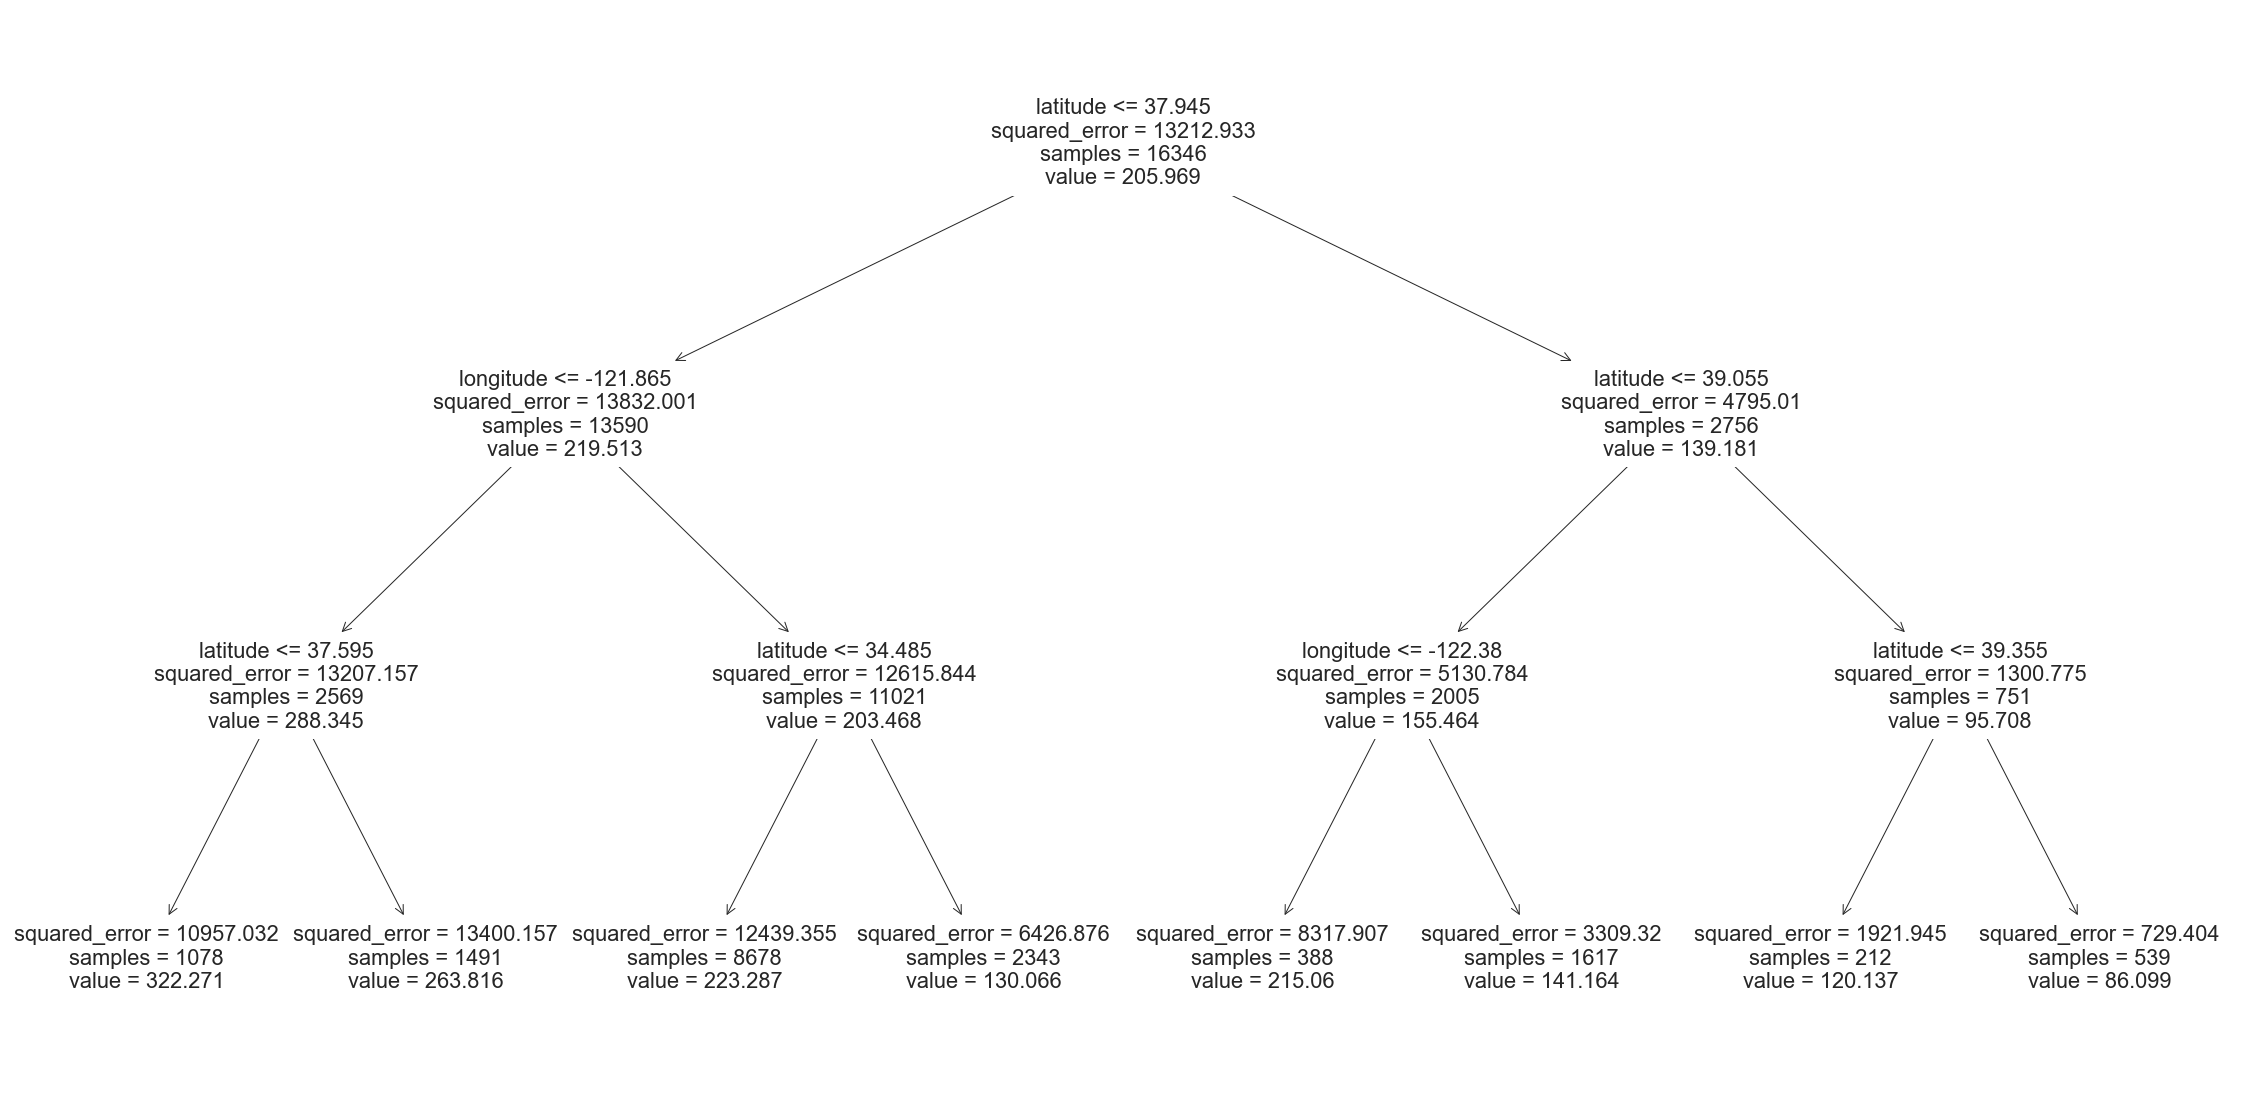

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20)) 
tree.plot_tree(ca_tree, feature_names = var_names)
plt.show()

We can run a quick cross-validation to assess this simple models predictive skill:

In [14]:
from sklearn import metrics

y_test_pred = ca_tree.predict(X_test)
print('Root mean squared error: %.2f'
      % metrics.mean_squared_error(y_test, y_test_pred, squared = False))

Root mean squared error: 102.15


Let's now remake the tree with the features we have been using before, to see how this changes. 

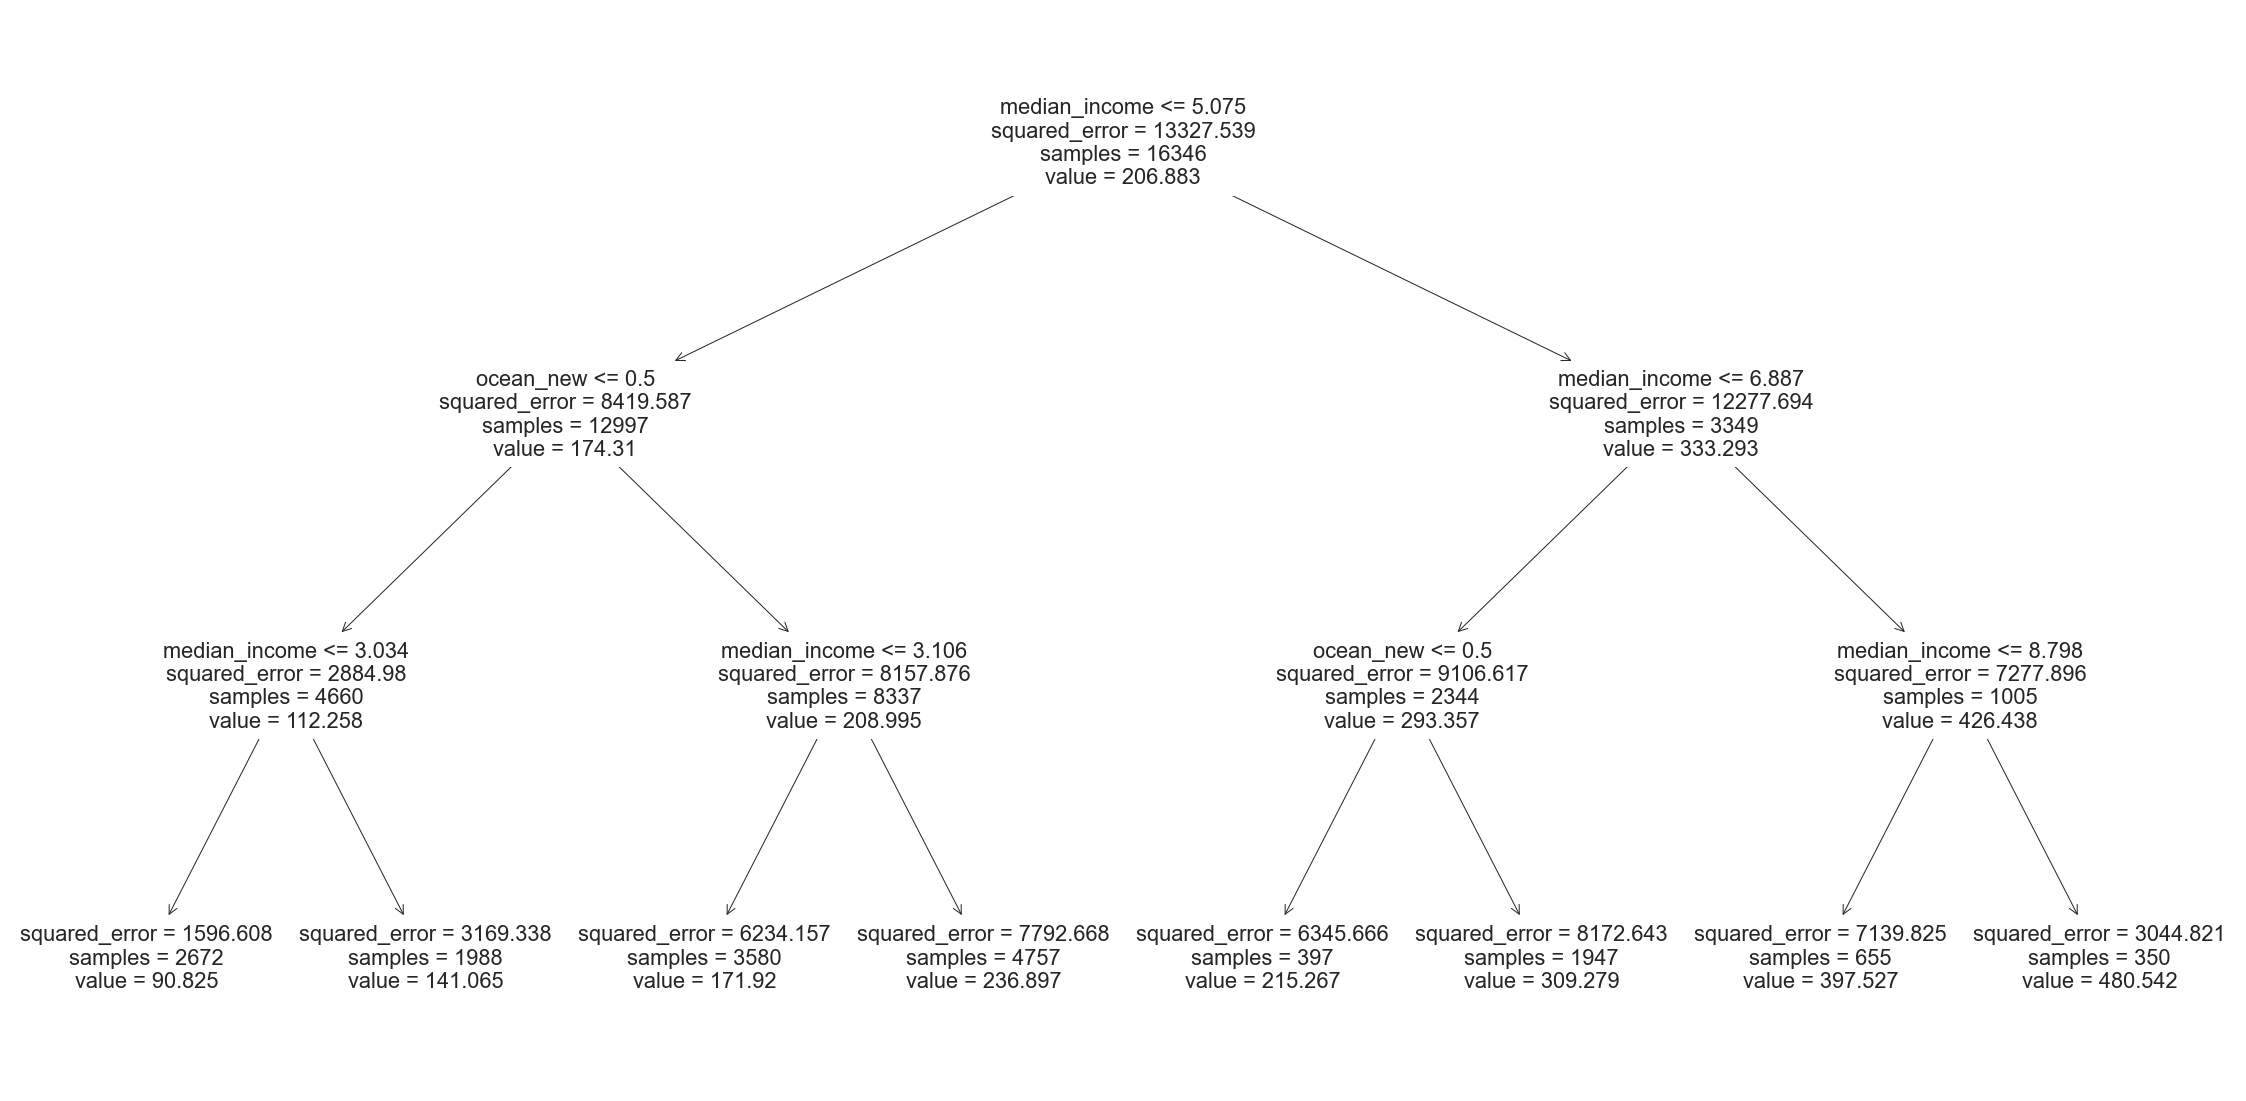

In [15]:
var_names = ['longitude', 'latitude', 'avg_rooms', 'bedroom_ratio', 'housing_median_age',
            'population', 'households', 'median_income', 'ocean_new']
X = housing[var_names]
y = housing['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8)
ca_tree = tree.DecisionTreeRegressor(max_depth = 3)
ca_tree = ca_tree.fit(X_train, y_train)

plt.figure(figsize=(40,20)) 
tree.plot_tree(ca_tree, feature_names = var_names)
plt.show()

This shows a clear and interpretable partitioning of the data, with median income showing as the most important feature in the first split. Let's see if this improves the predictive skill:

In [16]:
y_test_pred = ca_tree.predict(X_test)
print('Root mean squared error: %.2f'
      % metrics.mean_squared_error(y_test, y_test_pred, squared = False))

Root mean squared error: 75.73


## Random forest

Next, we'll build a random forest for the Pinus data. scikit-learn's random forest functions are found in the `ensemble` sub-module. Let's import this and then set up, train and test a random forest classifier. 

In [17]:
from sklearn import ensemble

In [18]:
ca_rf = ensemble.RandomForestRegressor()
ca_rf.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
y_test_pred = ca_rf.predict(X_test)
#metrics.roc_auc_score(y_test, y_test_pred[:,1])

#### Variable importance

Next we'll plot the permutation-based variable importance for this model. As a reminder, variable importance is a measure of how much worse a model becomes when we scramble the values of one of the features. The model is used to predict the outcome for some test data (here the out-of-bag samples) twice: once with the original values of the feature and once with randomly shuffled values. If there is a large difference in the skill of the model, this feature is important in controlling the outcome. 

As the result of the grid-based tuning includes the best estimator, we'll use this to get the variable importance values as follows:

In [20]:
ca_rf.feature_importances_

array([0.10315646, 0.09821274, 0.03161082, 0.03783799, 0.0515684 ,
       0.02700909, 0.02880239, 0.47839112, 0.14341101])

As this is a just an array, it is a little difficult to parse out any differences. Instead, we'll sort them and print them together with the feature names:

In [21]:
importances = ca_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], var_names[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature 7 median_income (0.478391)
2. feature 8 ocean_new (0.143411)
3. feature 0 longitude (0.103156)
4. feature 1 latitude (0.098213)
5. feature 4 housing_median_age (0.051568)
6. feature 3 bedroom_ratio (0.037838)
7. feature 2 avg_rooms (0.031611)
8. feature 6 households (0.028802)
9. feature 5 population (0.027009)


And we can also plot the values as a bar plot:

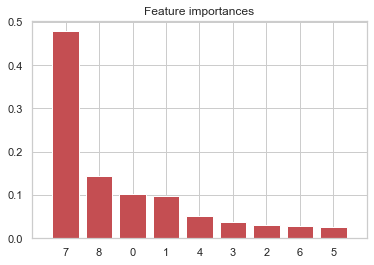

In [22]:
# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

We can look at the form of the relationship between the occurrence of the pine and this feature (and any other one) using a partial dependency plot. This shows changes in the outcome across the range of some feature (with all other features held constant). Here, we'll use the `plot_partial_dependence()` function from the the `inspection` submoduleto produce the plot. As arguments, this requires the model, the DataFrame or array used to build the model, and the feature that you want to show. This will take an array of feature indices, allowing you to plot several dependency plots together.


/Users/u0784726/miniforge3/envs/geog5160/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


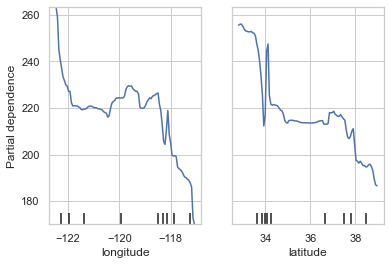

In [23]:
## Latitude and longitude partial dependency
from sklearn.inspection import plot_partial_dependence
plot_partial_dependence(ca_rf, X, [0,1]) 

/Users/u0784726/miniforge3/envs/geog5160/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


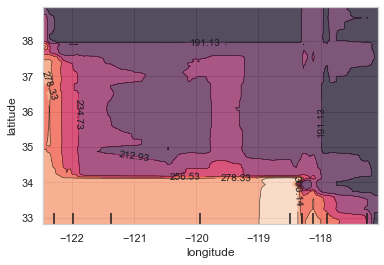

In [24]:
plot_partial_dependence(ca_rf, X, [(0,1)])

In [25]:
from sklearn.inspection import partial_dependence
ca_pd = partial_dependence(ca_rf, X, [0,1], kind='average') 

In [26]:
lon = pd.Series(ca_pd['values'][0])
lat = pd.Series(ca_pd['values'][1])

In [27]:
lon = pd.concat([lon]*100, ignore_index=True)
lat = lat.repeat(repeats = 100)

In [28]:
df = pd.DataFrame({"lon": lon.values, "lat": lat.values, "val": pd.Series(np.ravel(ca_pd.average))})

In [29]:
df.head()

,lon,lat,val
0,-122.470000,32.82,296.497711
1,-122.415556,32.82,296.554178
2,-122.361111,32.82,296.657864
3,-122.306667,32.82,296.419499
4,-122.252222,32.82,296.287861


<AxesSubplot:>

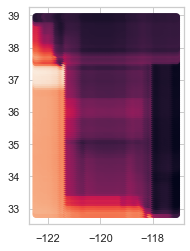

In [30]:
import geopandas
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.lon, df.lat), crs = 'EPSG:4326')
gdf.plot(column = 'val')

In [31]:
borders = geopandas.read_file("../datafiles/ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp")

In [33]:
gdf2 = geopandas.clip(gdf, borders)

(-122.73949999999999, -116.8105, 32.513, 39.267)

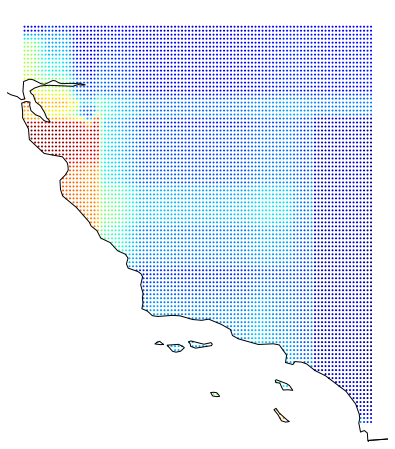

In [34]:
ax = gdf2.plot(markersize=1, figsize=(12, 8), column='val', cmap='jet')
plt.autoscale(False)
borders.to_crs(gdf.crs).plot(ax=ax, color='none', edgecolor='black')
ax.axis('off')